In [2]:
import pandas as pd

# Load the Excel file
df = pd.read_csv("chatgpt_style_reviews.csv")

print("First 5 rows:")
df.head()

First 5 rows:


,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-12-24,East list local interesting far magazine father.,Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No
1,2024-07-26,Road determine picture figure hard experience ...,Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No
2,2024-08-22,Policy social past analysis whole.,Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No
3,2025-04-24,News financial billion four foreign.,Great tool for generating content quickly. Sta...,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No
4,2024-08-15,To skill she case sing stop likely.,Excellent for language translation and grammar...,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes


In [3]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               50 non-null     object
 1   title              50 non-null     object
 2   review             50 non-null     object
 3   rating             50 non-null     int64 
 4   username           50 non-null     object
 5   helpful_votes      50 non-null     int64 
 6   review_length      50 non-null     int64 
 7   platform           50 non-null     object
 8   language           50 non-null     object
 9   location           50 non-null     object
 10  version            50 non-null     object
 11  verified_purchase  50 non-null     object
dtypes: int64(3), object(9)
memory usage: 4.8+ KB
None


In [4]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
date                 0
title                0
review               0
rating               0
username             0
helpful_votes        0
review_length        0
platform             0
language             0
location             0
version              0
verified_purchase    0
dtype: int64


In [5]:
print("\nRating distribution:")
print(df['rating'].value_counts())


Rating distribution:
rating
2    13
3    13
5    10
1     7
4     7
Name: count, dtype: int64


In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [7]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [14]:

def clean_text(text):
    text = text.lower() # Lowercase
    text = re.sub(r'[^a-z\s]', '', text) # Remove special chars/numbers
    words = text.split() 
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words] # Tokenize and lemmatize
    return ' '.join(words)

In [19]:
df['cleaned_review'] = df['review'].apply(clean_text)

In [11]:
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,cleaned_review
0,2024-12-24,East list local interesting far magazine father.,Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No,impressive natural language understanding almo...
1,2024-07-26,Road determine picture figure hard experience ...,Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No,sometimes give wrong answer outdated info stud...
2,2024-08-22,Policy social past analysis whole.,Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No,great tool generating content quickly interest...
3,2025-04-24,News financial billion four foreign.,Great tool for generating content quickly. Sta...,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No,great tool generating content quickly start me...
4,2024-08-15,To skill she case sing stop likely.,Excellent for language translation and grammar...,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes,excellent language translation grammar fix pri...


In [12]:
# Add review length
df['review_length'] = df['review'].apply(len)

In [13]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

In [14]:
print(df.head())

        date                                              title  \
0 2024-12-24   East list local interesting far magazine father.   
1 2024-07-26  Road determine picture figure hard experience ...   
2 2024-08-22                 Policy social past analysis whole.   
3 2025-04-24               News financial billion four foreign.   
4 2024-08-15                To skill she case sing stop likely.   

                                              review  rating     username  \
0  Impressive natural language understanding. Alm...       1     darren55   
1  Sometimes gives wrong answers or outdated info...       2   davistyler   
2  Great tool for generating content quickly. Int...       5     andrea59   
3  Great tool for generating content quickly. Sta...       3      dcooper   
4  Excellent for language translation and grammar...       1  christine79   

   helpful_votes  review_length     platform language  \
0             25             76  Google Play       de   
1             35    

C:\Users\kumar\AppData\Local\Temp\ipykernel_15792\2369013970.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


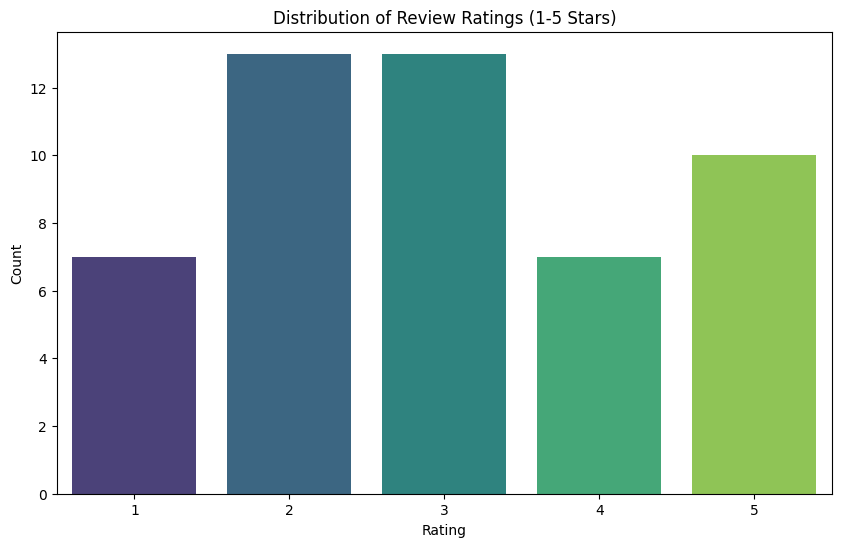

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

#Rating Distribution (Bar Chart)
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Review Ratings (1-5 Stars)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

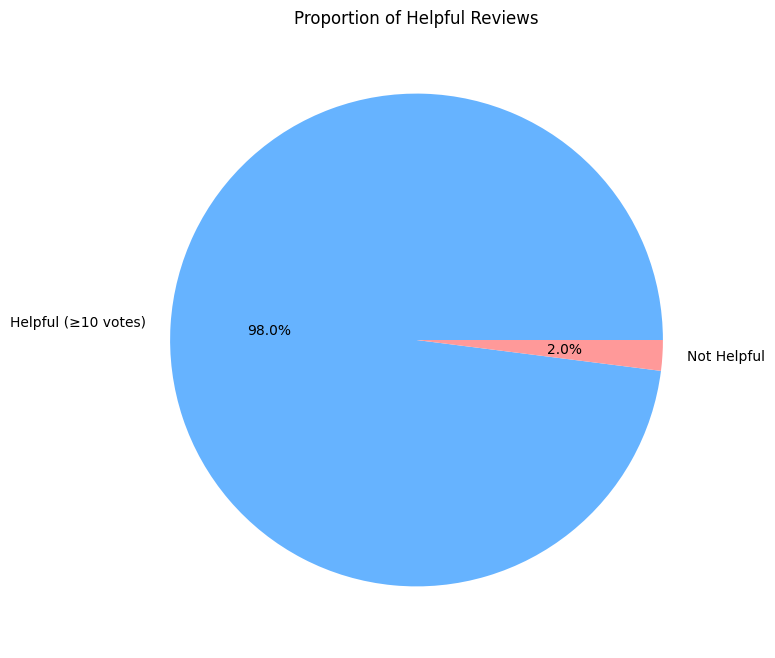

In [16]:
#Helpful Reviews (Pie Chart)
helpful_threshold = 10
helpful = df[df['helpful_votes'] >= helpful_threshold]
not_helpful = df[df['helpful_votes'] < helpful_threshold]

plt.figure(figsize=(8, 8))
plt.pie([len(helpful), len(not_helpful)], 
        labels=[f'Helpful (≥{helpful_threshold} votes)', 'Not Helpful'], 
        autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title('Proportion of Helpful Reviews')
plt.show()

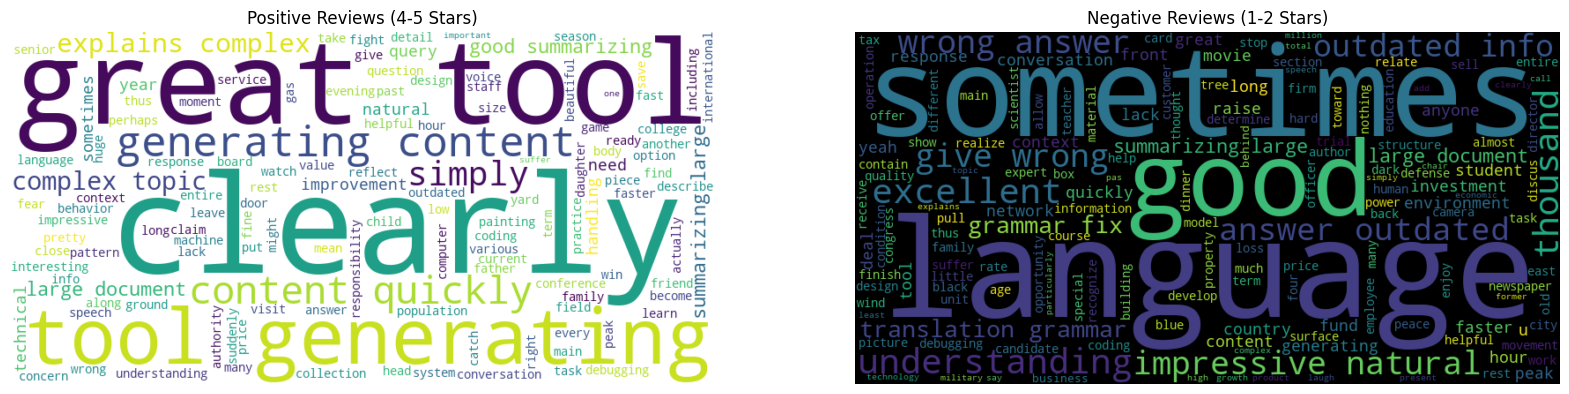

In [17]:
#Keywords in Positive vs Negative Reviews (Word Clouds)
from wordcloud import WordCloud

# Positive reviews (4-5 stars)
positive_text = ' '.join(df[df['rating'] >= 4]['cleaned_review'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Negative reviews (1-2 stars)
negative_text = ' '.join(df[df['rating'] <= 2]['cleaned_review'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(wordcloud_pos, interpolation='bilinear')
ax1.set_title('Positive Reviews (4-5 Stars)')
ax1.axis('off')
ax2.imshow(wordcloud_neg, interpolation='bilinear')
ax2.set_title('Negative Reviews (1-2 Stars)')
ax2.axis('off')
plt.show()

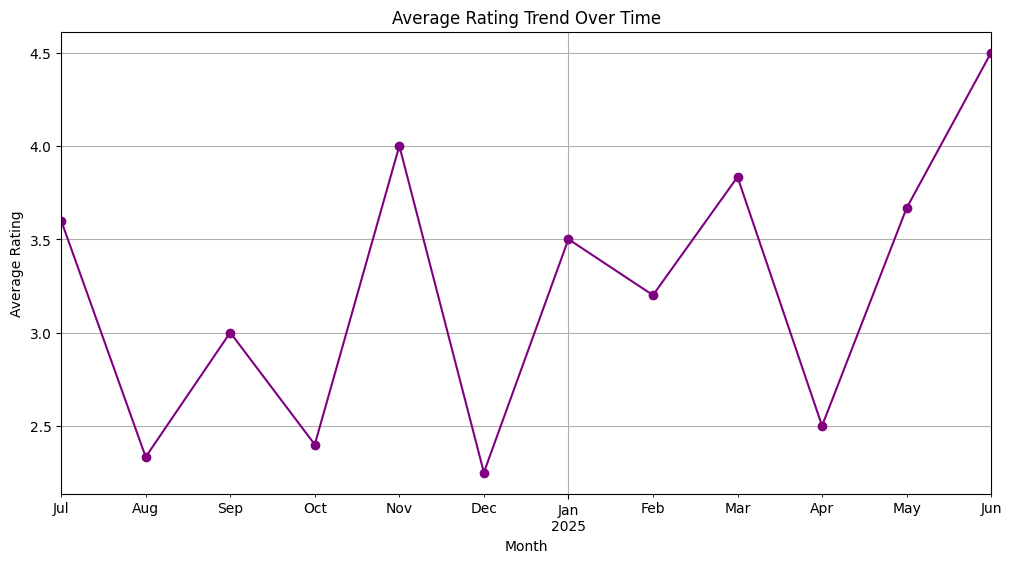

In [18]:
#Average Rating Over Time (Line Chart)
df['month'] = df['date'].dt.to_period('M')
monthly_avg = df.groupby('month')['rating'].mean()

plt.figure(figsize=(12, 6))
monthly_avg.plot(marker='o', color='purple')
plt.title('Average Rating Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

C:\Users\kumar\AppData\Local\Temp\ipykernel_15792\2509040060.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='location', y='rating', data=avg_ratings, palette='Set3')


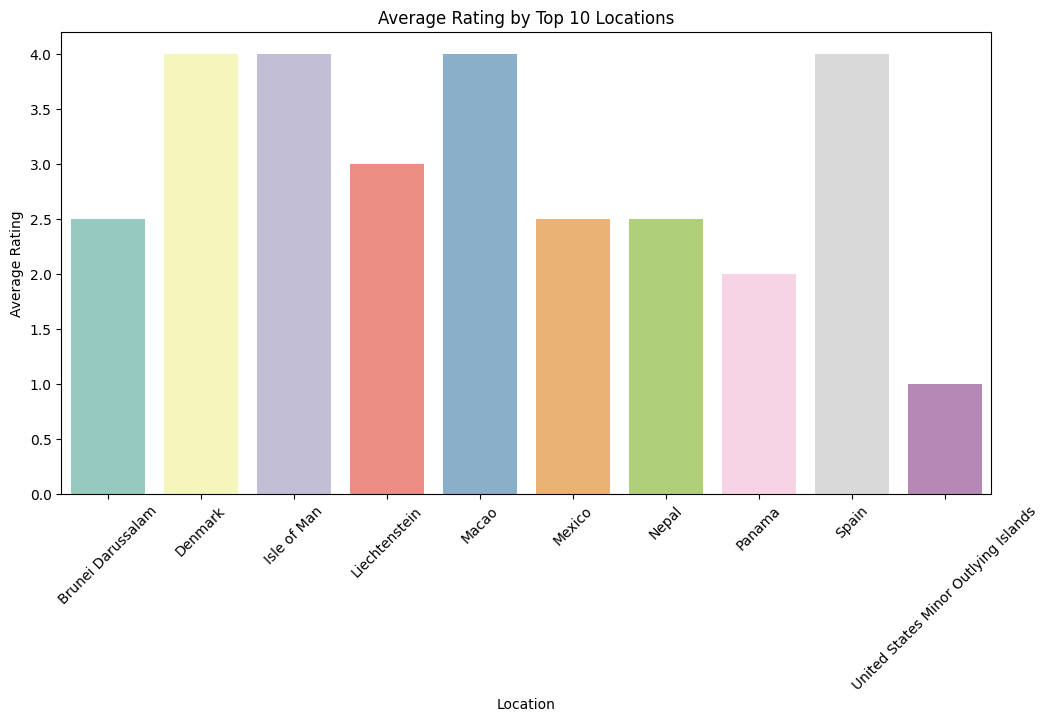

In [5]:
top_locations = df['location'].value_counts().head(10).index

# Filter and compute mean rating per location
avg_ratings = df[df['location'].isin(top_locations)].groupby('location')['rating'].mean().reset_index()

# Plot barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='rating', data=avg_ratings, palette='Set3')
plt.title('Average Rating by Top 10 Locations')
plt.xticks(rotation=45)
plt.ylabel('Average Rating')
plt.xlabel('Location')
plt.show()

C:\Users\kumar\AppData\Local\Temp\ipykernel_15792\1380463762.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='platform', y='rating', data=platform_avg, palette='pastel')


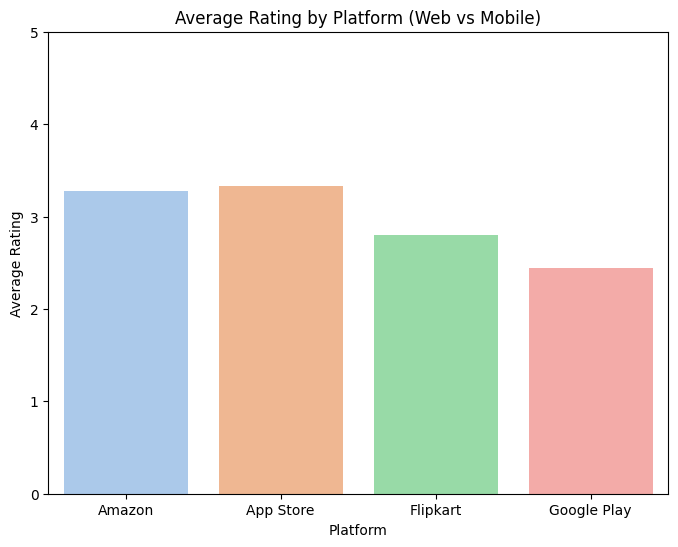

In [7]:
# Calculate average rating per platform
platform_avg = df.groupby('platform')['rating'].mean().reset_index()

# Plot grouped bar chart (even if it's just 2 platforms)
plt.figure(figsize=(8, 6))
sns.barplot(x='platform', y='rating', data=platform_avg, palette='pastel')

plt.title('Average Rating by Platform (Web vs Mobile)')
plt.ylabel('Average Rating')
plt.xlabel('Platform')
plt.ylim(0, 5)  # assuming ratings are on a 0–5 scale
plt.show()

C:\Users\kumar\AppData\Local\Temp\ipykernel_15792\3712259032.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='verified_purchase', y='rating', data=verified_avg, palette='coolwarm')


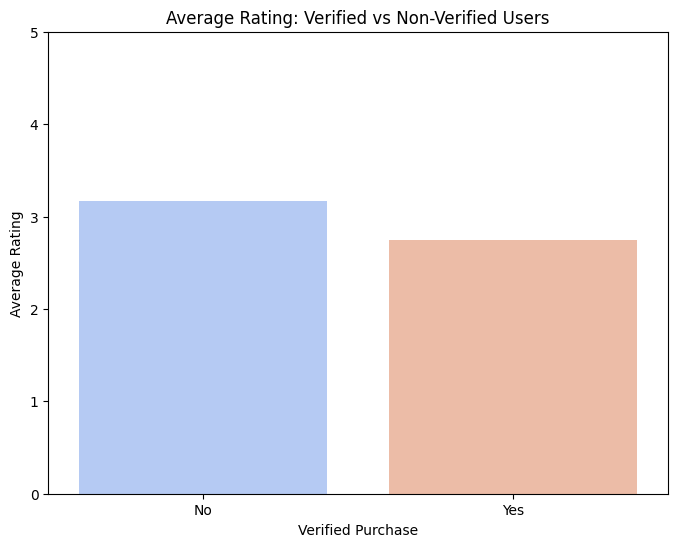

In [8]:
# Calculate average rating for verified vs non-verified users
verified_avg = df.groupby('verified_purchase')['rating'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='verified_purchase', y='rating', data=verified_avg, palette='coolwarm')

plt.title('Average Rating: Verified vs Non-Verified Users')
plt.xlabel('Verified Purchase')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  # assuming 0–5 scale
plt.show()

In [10]:
# Define sentiment mapping
def get_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

# Create the column
df['sentiment'] = df['rating'].apply(get_sentiment)

C:\Users\kumar\AppData\Local\Temp\ipykernel_15792\655685075.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='review_length', data=avg_length_sentiment, palette='autumn')


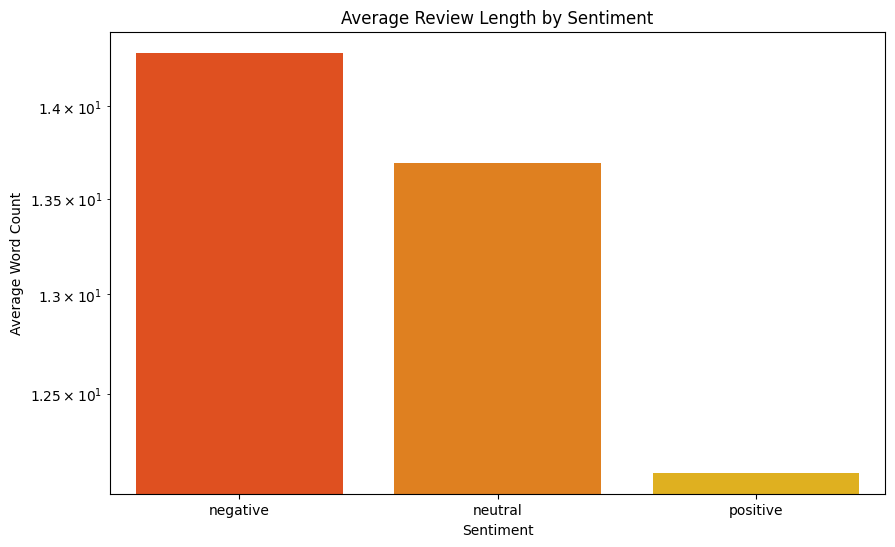

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average review length per sentiment
avg_length_sentiment = df.groupby('sentiment')['review_length'].mean().reindex(['negative','neutral','positive']).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='sentiment', y='review_length', data=avg_length_sentiment, palette='autumn')
plt.title('Average Review Length by Sentiment')
plt.ylabel('Average Word Count')
plt.xlabel('Sentiment')
plt.yscale('log')  # Keep log scale if review lengths vary widely
plt.show()

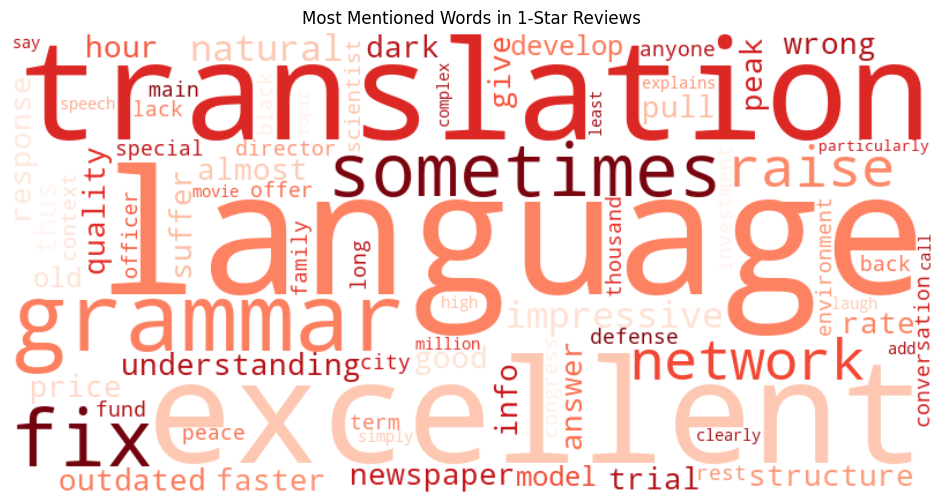

In [22]:
from wordcloud import WordCloud
# Combine all words from 1-star reviews
one_star_text = ' '.join(df[df['rating'] == 1]['cleaned_review'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(one_star_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Mentioned Words in 1-Star Reviews')
plt.show()

C:\Users\kumar\AppData\Local\Temp\ipykernel_15792\1649694285.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='version', y='rating', data=version_avg, palette='crest')


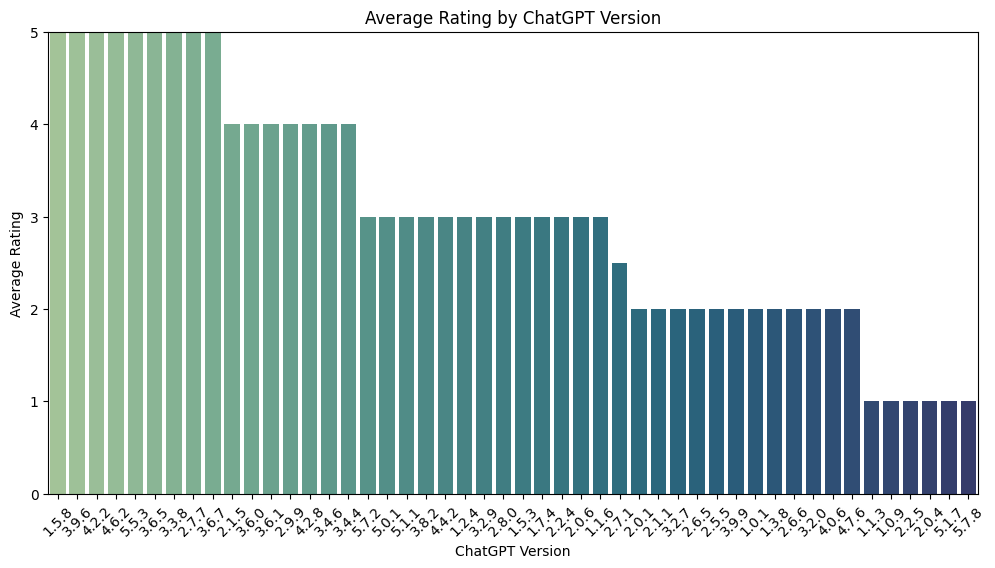

In [23]:
# Calculate average rating per version
version_avg = df.groupby('version')['rating'].mean().reset_index().sort_values('rating', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='version', y='rating', data=version_avg, palette='crest')

plt.title('Average Rating by ChatGPT Version')
plt.xlabel('ChatGPT Version')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  # Assuming a 0–5 rating scale
plt.xticks(rotation=45)
plt.show()

In [26]:
#Model Training & Evaluation
#Feature Engineering
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = tfidf.fit_transform(df['cleaned_review'])
y = df['sentiment']  # Created during EDA

In [27]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [28]:
#Train Models 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier()
}

best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    
    # Track the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

Logistic Regression Accuracy: 0.20
Naive Bayes Accuracy: 0.40
Random Forest Accuracy: 0.20


Best Model Evaluation:
              precision    recall  f1-score   support

    negative       0.29      1.00      0.44         2
     neutral       0.00      0.00      0.00         3
    positive       0.67      0.40      0.50         5

    accuracy                           0.40        10
   macro avg       0.32      0.47      0.31        10
weighted avg       0.39      0.40      0.34        10



d:\NLP\env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\NLP\env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\NLP\env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


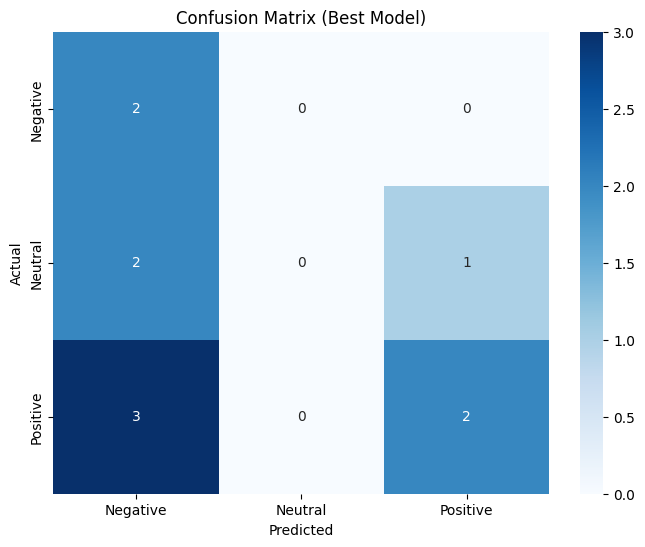

In [29]:
#Evaluate Metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions with the best model
y_pred = best_model.predict(X_test)

# Classification report
print("Best Model Evaluation:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred), 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=['Negative', 'Neutral', 'Positive'],
    yticklabels=['Negative', 'Neutral', 'Positive']
)
plt.title("Confusion Matrix (Best Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
import pandas as pd
from datasets import load_dataset
from google_play_scraper import Sort, reviews_all
import os


d:\NLP\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
# Create directory if it doesn't exist
os.makedirs('data', exist_ok=True)


In [ ]:
from google_play_scraper import reviews_all, Sort

reviews = reviews_all(
    'com.openai.chatgpt',
    lang='en',
    country='us',
    sort=Sort.NEWEST,
    count=1000  # Number of reviews
)

df = pd.DataFrame(reviews)[['content', 'score', 'at']]
df.columns = ['review', 'rating', 'date']

In [ ]:
df.head()

In [ ]:
# Check basic stats
print(df.info())
print(df['rating'].value_counts())

In [ ]:
df.to_csv('chatgpt_play_store_reviews.csv', index=False)

In [ ]:
# Handle missing values
scraped_data = df.dropna(subset=['review'])

In [ ]:
import re

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

scraped_data['cleaned_review'] = scraped_data['review'].apply(clean_text)
scraped_data.head()

In [ ]:
existing_df = pd.read_csv("chatgpt_style_reviews.csv") 
scraped_df = pd.read_csv("chatgpt_play_store_reviews.csv")

In [ ]:
scraped_df = scraped_df.rename(columns={'content': 'review'})
scraped_df['platform'] = 'Mobile'  # Add missing column

In [ ]:
# Merge vertically
combined_df = pd.concat([existing_df, scraped_df], ignore_index=True)
combined_df.head()


In [ ]:
print(combined_df.info())

In [ ]:
import re

def is_english_simple(text):
    text = str(text).lower()
    # Basic check: >70% typical English characters/words
    english_chars = len(re.findall(r'[a-z\\s]', text))
    return english_chars / len(text) > 0.7 if text else False

combined_df = combined_df[combined_df['review'].apply(is_english_simple)].copy()

In [ ]:
combined_df.tail()

In [ ]:
combined_df.isnull().sum()

In [ ]:
# List all columns you want to KEEP
columns_to_keep = ['review', 'rating', 'date', 'platform']  

# Drop all other columns (in-place)
combined_df.drop(columns=combined_df.columns.difference(columns_to_keep), inplace=True)
combined_df.head()

In [ ]:
combined_df.to_csv('final_data.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load preprocessed English data
df = pd.read_csv('final_data.csv')

# Create sentiment labels (if not already done)
df['sentiment'] = df['rating'].apply(
    lambda x: 'positive' if x >=4 else 'negative' if x <=2 else 'neutral'
)

# Verify class distribution
print(df['sentiment'].value_counts())

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Option A: TF-IDF (Best for traditional ML)
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),  # Capture phrases like "not good"
    stop_words='english'
)
X = tfidf.fit_transform(df['review'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    df['sentiment'],
    test_size=0.2,
    stratify=df['sentiment'],  # Preserve class balance
    random_state=43
)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} Accuracy: {model.score(X_test, y_test):.2f}")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# For best traditional model
best_model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt='d',
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)

In [ ]:
import pickle
# Save both TF-IDF and model
with open('sentiment_pipeline.pkl', 'wb') as f:
    pickle.dump({
        'tfidf': tfidf,
        'model': best_model
    }, f)

In [ ]:
import pickle
from textblob import TextBlob

def load_model():
    """Load the sentiment analysis pipeline"""
    try:
        with open('sentiment_pipeline.pkl', 'rb') as f:
            pipeline = pickle.load(f)
        return pipeline['model'], pipeline['tfidf']
    except FileNotFoundError:
        print("Model file not found. Using TextBlob as fallback.")
        return None, None

def predict_sentiment(text, model=None, vectorizer=None):
    """Predict sentiment with confidence score"""
    if model and vectorizer:
        vec = vectorizer.transform([text])
        proba = model.predict_proba(vec)[0]
        sentiment = model.predict(vec)[0]
        confidence = round(max(proba) * 100, 1)
    else:
        analysis = TextBlob(text)
        sentiment = 'positive' if analysis.sentiment.polarity > 0 else 'negative'
        confidence = round(abs(analysis.sentiment.polarity) * 100, 1)
    return sentiment, confidence

def main():
    print("\n" + "="*50)
    print("💬 CHATGPT REVIEW SENTIMENT ANALYZER")
    print("="*50)
    print("Type a ChatGPT review and press Enter to analyze")
    print("Type 'quit' to exit\n")
    
    model, vectorizer = load_model()
    
    while True:
        review = input("\nEnter a ChatGPT review (or 'quit' to exit): ").strip()
        
        # Exit condition
        if review.lower() == 'quit':
            print("\nThank you for using the analyzer! Goodbye! 👋")
            break  # This exits the loop
        
        if not review:
            print("⚠️ Please enter a valid review")
            continue
            
        sentiment, confidence = predict_sentiment(review, model, vectorizer)
        
        print("\n" + "="*50)
        print(f"📝 REVIEW: {review}")
        print("-"*50)
        print(f"🧠 SENTIMENT: {'👍 POSITIVE' if sentiment == 'positive' else '👎 NEGATIVE' if sentiment == 'negative' else '😐 NEUTRAL'}")
        print(f"🎯 CONFIDENCE: {confidence}%")
        print("="*50)

if __name__ == "__main__":
    main()  # Program will exit completely after loop breaks


💬 CHATGPT REVIEW SENTIMENT ANALYZER
Type a ChatGPT review and press Enter to analyze
Type 'quit' to exit


📝 REVIEW: vood
--------------------------------------------------
🧠 SENTIMENT: 👍 POSITIVE
🎯 CONFIDENCE: 84.5%

📝 REVIEW: experience is fasinating
--------------------------------------------------
🧠 SENTIMENT: 👍 POSITIVE
🎯 CONFIDENCE: 80.5%

Thank you for using the analyzer! Goodbye! 👋
